In [1]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)


In [3]:
engine.execute("USE sakila")
query = '''select c.customer_id as "Customer ID", ct.city as "City", rcat.name as "Most Rented Category",
count(distinct p.payment_id) as "Films Rented", sum(distinct p.amount) as "Total Money Spent",
dense_rank() over(partition by c.customer_id order by count(cat.category_id) desc) as "Delete", 
count(distinct frm.payment_id) as "Films rented May", count(distinct frj.payment_id) as "Films rented June"
from rental r
join customer c on c.customer_id = r.customer_id
join payment p on p.customer_id = c.customer_id 
join address ad on ad.address_id = c.address_id
join city ct on ct.city_id = ad.city_id
join inventory i on i.inventory_id = r.inventory_id
join film_category cat  on cat.film_id = i.film_id
join category rcat on rcat.category_id = cat.category_id
left join
	(select customer_id, payment_id, payment_date
    from payment
    where (date(payment_date) between date('2005-05-01') and date('2005-05-30'))
    order by customer_id asc
    ) as frm
    on frm.customer_id = c.customer_id 
left join
	(select customer_id, payment_id, payment_date
    from payment
    where (date(payment_date) between date('2005-06-01') and date('2005-06-30'))
    order by customer_id asc
    ) as frj
    on frj.customer_id = c.customer_id 
group by c.customer_id
order by c.customer_id'''
data = pd.read_sql_query(query, engine)
data.head()

,Customer ID,City,Most Rented Category,Films Rented,Total Money Spent,Delete,Films rented May,Films rented June
0,1,Sasebo,Drama,32,38.92,1,2,7
1,2,San Bernardino,Animation,27,32.94,1,1,1
2,3,Athenai,Action,26,55.90,1,2,4
3,4,Myingyan,Animation,22,36.92,1,0,6
4,5,Nantou,Children,38,46.91,1,1,5


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
print("The dataframe has {} rows and {} columns".format(data.shape[0],data.shape[1]))
print()
print("The data types of each column of the dataframe are:")
print(data.dtypes)
print("The number of NA's in the dataframe is: ")
print(data.isna().sum())
print()

The dataframe has 584 rows and 8 columns

The data types of each column of the dataframe are:
Customer ID               int64
City                     object
Most Rented Category     object
Films Rented              int64
Total Money Spent       float64
Delete                    int64
Films rented May          int64
Films rented June         int64
dtype: object
The number of NA's in the dataframe is: 
Customer ID             0
City                    0
Most Rented Category    0
Films Rented            0
Total Money Spent       0
Delete                  0
Films rented May        0
Films rented June       0
dtype: int64



In [5]:
data = data.drop("Delete", axis = 1)

The categorical columns are:  ['City', 'Most Rented Category']

Frequecny analysis of column:  City

Frequecny analysis of column:  Most Rented Category



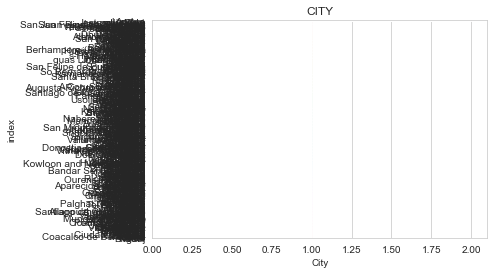

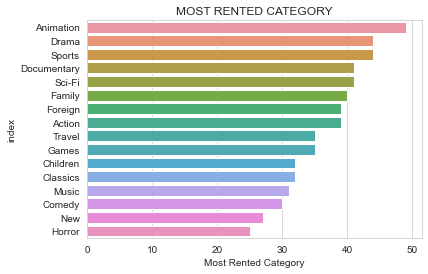

<Figure size 432x288 with 0 Axes>

In [6]:
cols_cat = list(data.select_dtypes(include=['object']).columns)
print("The categorical columns are: ",cols_cat)
print("========================================")
print()
for col in cols_cat:
    print("Frequecny analysis of column: ",col)
    my_data = data[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print()

The numerical columns are:  Index(['Customer ID', 'Films Rented', 'Total Money Spent', 'Films rented May',
       'Films rented June'],
      dtype='object')



D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


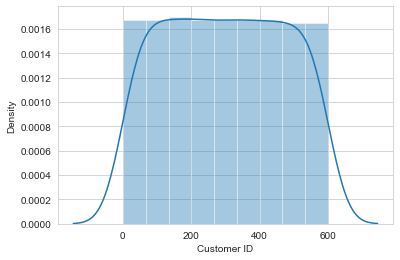

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


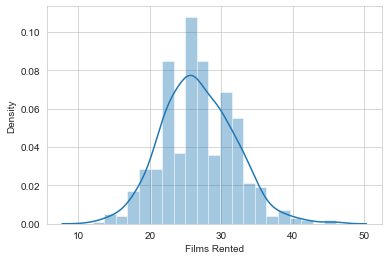

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


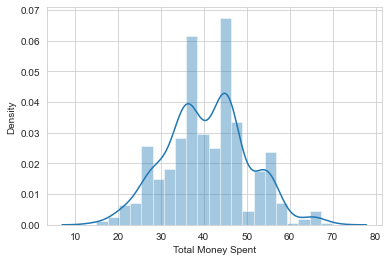

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


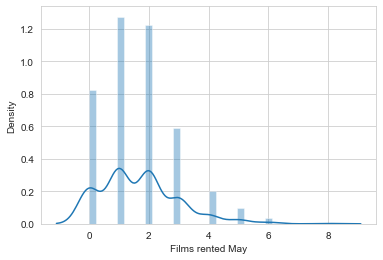

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


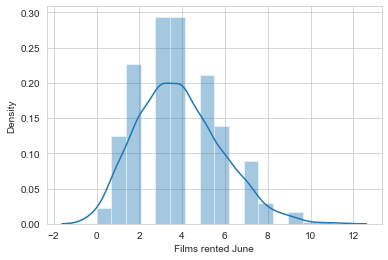

In [7]:
## checking all the numerical columns
df_num = data.select_dtypes("number")

print("The numerical columns are: ",df_num.columns)
print("========================================")
print()

for col in df_num.columns:
    sns.distplot(df_num[col])
    plt.show()

In [8]:
def if0(x):
    if x == 0:
        return x
    else:
        return 1
    
# data["Films rented May"] = list(map(if0, data["Films rented May"]))
data["Films rented June"] = list(map(if0, data["Films rented June"]))



data.head()

,Customer ID,City,Most Rented Category,Films Rented,Total Money Spent,Films rented May,Films rented June
0,1,Sasebo,Drama,32,38.92,2,1
1,2,San Bernardino,Animation,27,32.94,1,1
2,3,Athenai,Action,26,55.90,2,1
3,4,Myingyan,Animation,22,36.92,0,1
4,5,Nantou,Children,38,46.91,1,1


In [9]:
y = data['Films rented June']
X = data.drop('Films rented June', axis = 1)

In [10]:
X.head()

,Customer ID,City,Most Rented Category,Films Rented,Total Money Spent,Films rented May
0,1,Sasebo,Drama,32,38.92,2
1,2,San Bernardino,Animation,27,32.94,1
2,3,Athenai,Action,26,55.90,2
3,4,Myingyan,Animation,22,36.92,0
4,5,Nantou,Children,38,46.91,1


In [19]:
from sklearn.preprocessing import Normalizer
X_num = X.select_dtypes("number")
transformer = Normalizer().fit(X_num[["Customer ID"]])
x_num_normalized = pd.DataFrame(transformer.transform(X_num[["Customer ID"]]))
x_num_normalized.columns = [["Customer ID"]]
x_num_normalized

,Customer ID
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
579,1.0
580,1.0
581,1.0
582,1.0


In [14]:
X_cat = data.select_dtypes(include = np.object)
categorical = pd.get_dummies(X_cat, columns=['City', 'Most Rented Category'],drop_first=True)
categorical.head()

,City_Abha,City_Abu Dhabi,City_Acua,City_Adana,City_Addis Abeba,City_Aden,City_Adoni,City_Ahmadnagar,City_Akishima,City_Akron,...,Most Rented Category_Drama,Most Rented Category_Family,Most Rented Category_Foreign,Most Rented Category_Games,Most Rented Category_Horror,Most Rented Category_Music,Most Rented Category_New,Most Rented Category_Sci-Fi,Most Rented Category_Sports,Most Rented Category_Travel
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_new = pd.concat([x_num_normalized, X["Films rented May"], categorical], axis = 1 )

In [16]:
X_new

,Customer ID,Films Rented,Total Money Spent,Films rented May,Films rented May,City_Abha,City_Abu Dhabi,City_Acua,City_Adana,City_Addis Abeba,...,Most Rented Category_Drama,Most Rented Category_Family,Most Rented Category_Foreign,Most Rented Category_Games,Most Rented Category_Horror,Most Rented Category_Music,Most Rented Category_New,Most Rented Category_Sci-Fi,Most Rented Category_Sports,Most Rented Category_Travel
0,0.019827,0.634470,0.771675,0.039654,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.046893,0.633056,0.772328,0.023447,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.048578,0.421011,0.905174,0.032385,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.092671,0.509690,0.855353,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.082529,0.627217,0.774283,0.016506,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.996148,0.050226,0.071857,0.001674,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0.998173,0.046894,0.036745,0.010049,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
581,0.997605,0.041776,0.055027,0.003342,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0.997721,0.036705,0.056610,0.000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# so this isnt working and I cant work out why

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=23)

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = classification.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()  
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))